In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#import data
airline = pd.read_csv('EastWestAirlines1.csv')

In [3]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airline.drop('ID#',axis=1,inplace = True)

In [5]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
airline.shape

(3999, 11)

In [8]:
#Normalising the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(airline)

In [9]:
scaled_airline_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## Hierarchical clustering

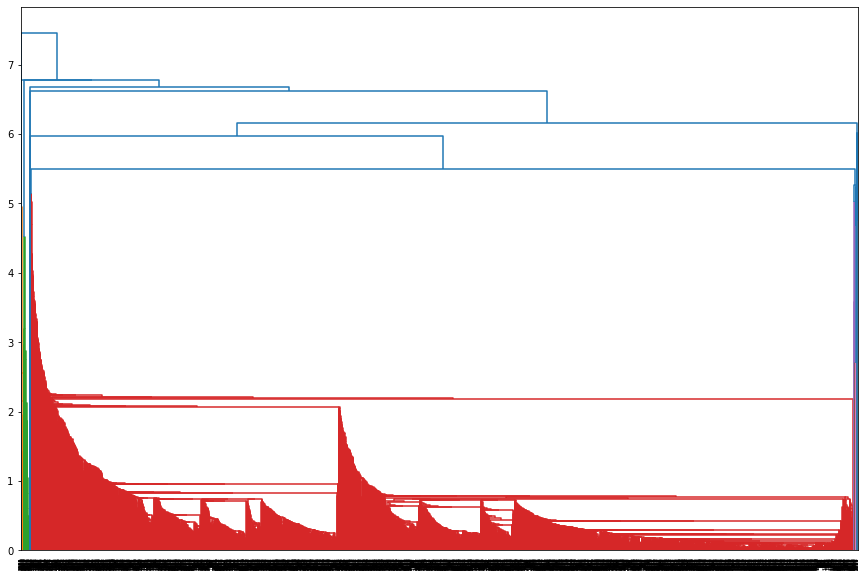

In [10]:
# create dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(scaled_airline_df, method='single'))

In [11]:
#make clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'single')

In [12]:
y_hc = hc.fit_predict(scaled_airline_df)
Clusters = pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
Clusters.head()

,Clusters
0,0
1,0
2,0
3,0
4,0


In [14]:
airline['h_clusterid'] = Clusters

In [15]:
airline.groupby('h_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,73660.086367,144.316847,2.063771,1.00703,1.012302,17118.787095,11.555611,451.558122,1.353753,4119.410746,0.370073
1,160114.000000,500.000000,1.000000,1.00000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.000000
2,52231.400000,66.666667,1.000000,3.00000,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000


From hierarchical clusterin we are getting 3 types of clusters:
1. Customers who earned more miles with frequent flier credit card and has less bonus miles.
2. Customers with more balance, balanced amount of miles from freq. flyer credit card,Rewards credit card and Small Business credit card and has more bonus miles.
3. Customers with less balance, more miles with Rewards credit card.

## K-Means clustering

In [16]:
from sklearn.cluster import KMeans

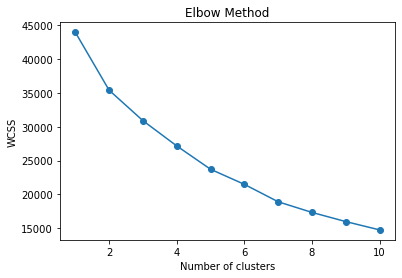

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airline_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))    
plt.plot(range(1, 11), wcss,marker = "o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#Build Cluster algorithm
k=3
clusters_new = KMeans(k, random_state=42)
clusters_new.fit(scaled_airline_df)
#Assign clusters to the data set
airline['clusterid_kmeans'] = clusters_new.labels_

In [19]:
airline.groupby('clusterid_kmeans').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
clusterid_kmeans,,,,,,,,,,,,
0,44605.587259,100.377606,1.243243,1.018919,1.000386,4899.749035,7.051737,198.801158,0.621236,3715.707722,0.206178,0.010039
1,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061,0.030303
2,117954.548232,151.036977,3.747588,1.002412,1.038585,40772.810289,19.047428,348.151125,1.031350,4879.751608,0.654341,0.000000


Kmeans is also giving 3 clusters in the airline customer dataset.

## DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

In [41]:
dbscan = DBSCAN(eps=1.2, min_samples=10)
dbscan.fit(scaled_airline_df)

DBSCAN(eps=1.2, min_samples=10)

In [42]:
airline['cluster_db'] = dbscan.labels_

In [43]:
airline.groupby('cluster_db').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_kmeans
cluster_db,,,,,,,,,,,,,
-1,186593.128788,1037.517045,2.645833,1.087121,1.092803,38952.592803,21.981061,2245.844697,6.518939,4692.382576,0.683712,0.058712,1.221591
0,53628.537409,7.117572,1.669517,1.000000,1.000000,9223.467721,8.548953,137.838820,0.427106,3804.350577,0.000000,0.000000,0.316375
1,62491.821429,10.586607,2.608929,1.000000,1.000000,23502.488393,13.078571,295.537500,0.936607,4512.878571,1.000000,0.000000,1.132143
2,31879.000000,0.000000,1.000000,2.000000,1.000000,8232.750000,12.166667,45.833333,0.250000,3311.750000,0.000000,0.000000,0.000000


Here also we can see that DBSCAN gives 3 clusters with eps=1.2 and minimum sample size =10.